Analysis of Tennis Player Prize Money

By Harmony Allan-Mah, Brandon Hui, Leo Qu and Elena Zettelmeyer

Tennis (singles) is a game played between two players with rackets where they hit a tennis ball back and forth until one player hits it out of bounds. The basic rules of tennis are as follows. The serving players stand at the baseline of their half, between the center mark and sideline. To be successful the ball must cross over the net without a bounce, and must land in the rectangle that is diagonally across from where they made the serve. Once a rally between the two players begins, each player must return before the ball bounces twice; they earn points when a shot is not returned or a shot goes out of bounds. A player's ability to return shots and maintain a rally is how their ability in the game is measured. 

How does a tennis player’s age, seasons, height, and various rankings influence the prize money that they can make?
 
The dataset that is operated on for this project is the “Player Stats for Top 500 Players” excel spreadsheet from Ultimate Tennis Statistics. There are a total of 500 rows (one for each player) and 38 columns consisting of various categories. 9 of these columns will be examined for this project, as we feel they are the most relevant to helping answer the predictive question above. The predictors are:

- Age
- Seasons (where Seasons is the number of seasons a player has played in their career)
- Current Elo Rank (where Current Elo Rank is how a player ranks in terms of their current elo*)
- Best Elo Rank (where Best Elo Rank is how a player ranks in terms of their peak elo*)
- Peak Elo Rating (where Peak Elo Rating is the player’s highest ever elo*)
- Height
- Current Rank (where Current Rank is a player’s current ranking amongst all tennis players in the world)
- Best Rank (where Best Rank is the highest ranking a player has achieved at any point in their career)
- GOAT Rank (where GOAT Rank is a player’s ranking amongst the Greatest (tennis players) of all Time)

*Elo is a type of measurement of a player’s ability. The idea behind the Elo system is that it provides an estimate of the player’s strength after each match. If a player wins, their Elo increases; if a player loses, their Elo decreases. The amount by which the Elo increases is determined by the difference between initial Elo’s of both players. When the difference is large and the player with the higher Elo initially wins, their Elo only increases slightly. In contrast, when the difference is still large but the lower rated player wins, their Elo increases substantially. When the Elo of both players in a match are similar, neither player will experience a substantial increase or decrease in Elo, regardless of outcome. 


The predictors will all be tested for their correlation to prize money, and those with insignificant correlation will not be used for the linear regression model. 

In [1]:
set.seed(2022) 

library(tidyverse)
library(tidymodels)
library(gridExtra)
library(GGally)

player_stats <- read_csv("data")

colnames(player_stats) <- make.names(colnames(player_stats), unique = TRUE)
player_stats_tidy <- player_stats |> filter(Active == "Yes", Current.Elo.Rank != "N/A", Height != "N/A", GOAT.Rank != "N/A") |> 
                                     select(Age, Seasons, Current.Elo.Rank, Best.Elo.Rank, Peak.Elo.Rating, Height, Current.Rank, Best.Rank, GOAT.Rank, Prize.Money) |> 
                                     mutate(Age = as.numeric(substr(Age, 1,2)), 
                                            Current.Rank = as.numeric(gsub("\\(.*?\\)", "", Current.Rank)),
                                            Best.Rank = as.numeric(gsub("\\(.*?\\)", "", Best.Rank)),
                                            Height = as.numeric(gsub("cm", "", Height)),
                                            Peak.Elo.Rating = as.numeric(gsub("\\(.*?\\)", "", Peak.Elo.Rating)),
                                            GOAT.Rank = as.numeric(gsub("\\(.*?\\)", "", GOAT.Rank)),
                                            Best.Elo.Rank = as.numeric(gsub("\\(.*?\\)", "", Best.Elo.Rank)),
                                            Current.Elo.Rank = as.numeric(gsub("[\\(\\)]", "", regmatches(Current.Elo.Rank, gregexpr("\\(.*?\\)", Current.Elo.Rank)))),
                                            Prize.Money = parse_number(Prize.Money))
player_stats_tidy

player_stats_split <- initial_split(player_stats_tidy, prop = 0.6, strata = Prize.Money)
player_stats_train <- training(player_stats_split)
player_stats_test <- testing(player_stats_split)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Age,Seasons,Current.Elo.Rank,Best.Elo.Rank,Peak.Elo.Rating,Height,Current.Rank,Best.Rank,GOAT.Rank,Prize.Money
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,11,1826,21,2037,193,183,17,264,6091971
31,14,2211,3,2329,198,121,3,33,25889586
33,14,1791,29,2004,190,130,19,264,10821168
32,15,1993,18,2068,198,45,11,157,11912152
32,16,2004,14,2112,178,12,9,151,13470614
29,11,1892,35,1962,180,27,23,357,4850190
32,13,1860,44,1946,190,161,33,357,7114496
27,11,1845,38,1953,183,304,40,489,4660132
35,18,1879,21,2029,190,85,18,293,10581476


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


The above table represents the training data we will utilize to create our prediction model. It in itself represents a randomized portion of the original tidied data set; more specifically 60% of it. It contains 10 variables, one of which is the value we are trying to predict, prize money. We know our data is properly tidied because each column is a single variable, and each value is a single cell, where the value is a reasonable number when considering the real life applications of each variable. 

In [53]:
player_stats_means_train <- map_dbl(player_stats_train, mean) |>
                           enframe() |> 
                           arrange(value) |> 
                           mutate(training_means = value, columns = name) |> 
                           select(-value, -name)

player_stats_means_all <- map_dbl(player_stats_tidy, mean) |> 
                           enframe() |> 
                           arrange(value) |> 
                           mutate(data_means = value) |>
                           bind_cols(player_stats_means_train) |>
                           select(-name, -value)
player_stats_means_all

data_means,training_means,columns
<dbl>,<dbl>,<chr>
1.367647e+01,1.382051e+01,Seasons
1.750000e+01,1.664103e+01,Best.Rank
2.216176e+01,2.148718e+01,Best.Elo.Rank
3.154412e+01,3.158974e+01,Age
8.651471e+01,7.556410e+01,Current.Rank
1.873971e+02,1.877436e+02,Height
2.367794e+02,2.279744e+02,GOAT.Rank
1.948603e+03,1.957051e+03,Current.Elo.Rank
2.092588e+03,2.105103e+03,Peak.Elo.Rating


>> insert description of mean table

In [54]:
player_stats_medians_train <- map_dbl(player_stats_train, median) |>
                           enframe() |> 
                           arrange(value) |> 
                           mutate(training_medians = value, columns = name) |> 
                           select(-value, -name)

player_stats_medians_all <- map_dbl(player_stats_tidy, median) |> 
                           enframe() |> 
                           arrange(value) |> 
                           mutate(data_medians = value) |>  
                           bind_cols(player_stats_medians_train) |> 
                           select(-name, -value)

player_stats_medians_all

data_medians,training_medians,columns
<dbl>,<dbl>,<chr>
13.0,14,Seasons
16.5,14,Best.Rank
21.0,21,Best.Elo.Rank
32.0,32,Age
60.5,45,Current.Rank
188.0,188,Height
249.0,222,GOAT.Rank
1932.5,1944,Current.Elo.Rank
2039.5,2062,Peak.Elo.Rating


>> insert description of median table

In [56]:
player_stats_sd_train <- map_dbl(player_stats_train, sd) |>
                           enframe() |> 
                           arrange(value) |> 
                           mutate(training_sds = value, columns = name) |> 
                           select(-value, -name)

player_stats_sd_all <- map_dbl(player_stats_tidy, sd) |> 
                           enframe() |> 
                           arrange(value) |> 
                           mutate(data_sds = value) |>  
                           bind_cols(player_stats_sd_train) |> 
                           select(-name, -value)

player_stats_sd_all

data_sds,training_sds,columns
<dbl>,<dbl>,<chr>
3.513051e+00,3.732630e+00,Age
3.534199e+00,3.824243e+00,Seasons
7.801913e+00,7.659593e+00,Height
1.247744e+01,1.193510e+01,Best.Rank
1.562872e+01,1.410650e+01,Best.Elo.Rank
7.532170e+01,7.396222e+01,Current.Rank
1.468635e+02,1.494906e+02,GOAT.Rank
1.495543e+02,1.630103e+02,Current.Elo.Rank
1.602614e+02,1.812297e+02,Peak.Elo.Rating


>> insert description of standard deviation table

In [59]:
player_cor <- cor(player_stats_tidy)
player_cor[ , 10]

Age          Seasons Current.Elo.Rank    Best.Elo.Rank 
      0.18767662       0.42030470       0.77216326      -0.50019089 
 Peak.Elo.Rating           Height     Current.Rank        Best.Rank 
      0.84909376       0.02801205      -0.32429820      -0.49511756 
       GOAT.Rank      Prize.Money 
     -0.57507299       1.00000000

>> insert description of correlation 

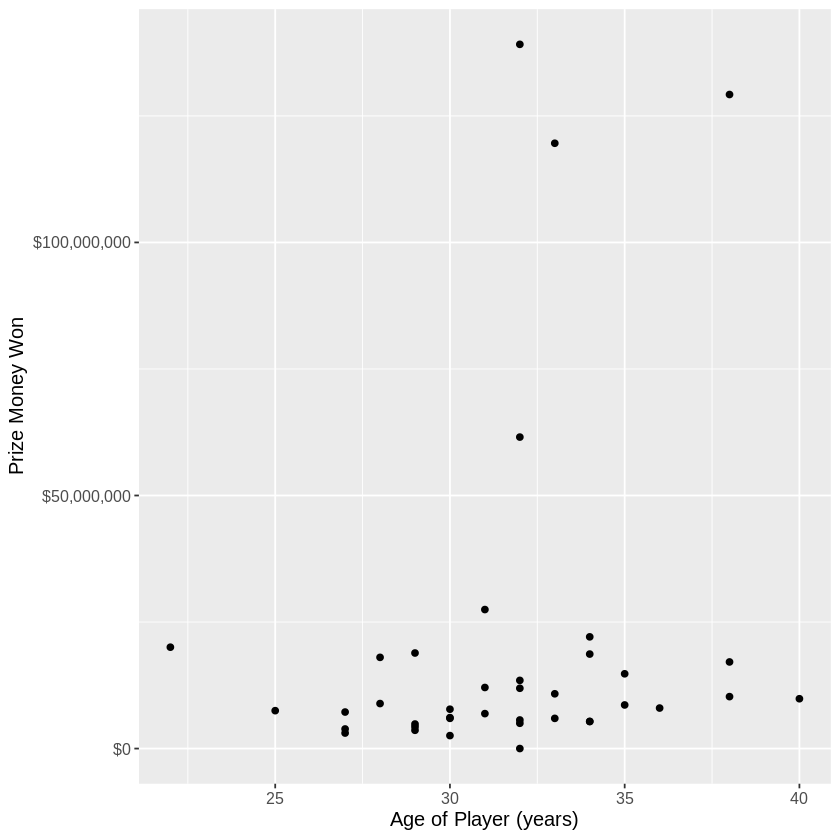

In [60]:
player_age_plot <- ggplot(player_stats_train, aes(x = Age, y = Prize.Money)) +
  geom_point() +
  xlab("Age of Player (years)") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_age_plot

>> insert description of age plot

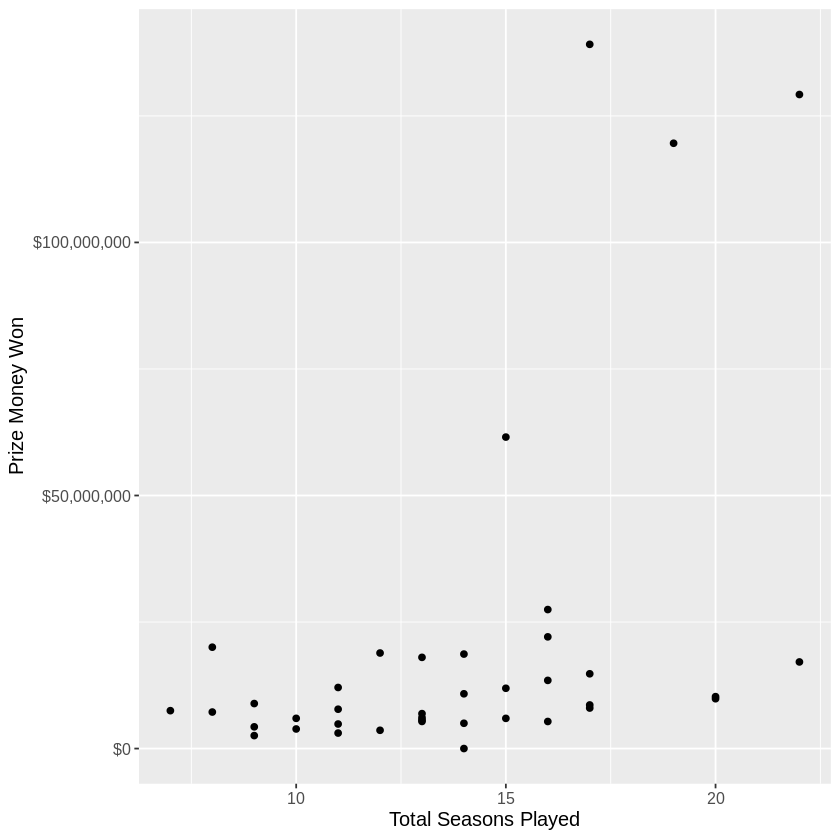

In [7]:
player_seasons_plot <- ggplot(player_stats_train, aes(x = Seasons, y = Prize.Money)) +
  geom_point() +
  xlab("Total Seasons Played") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_seasons_plot

>> insert description of seasons plot

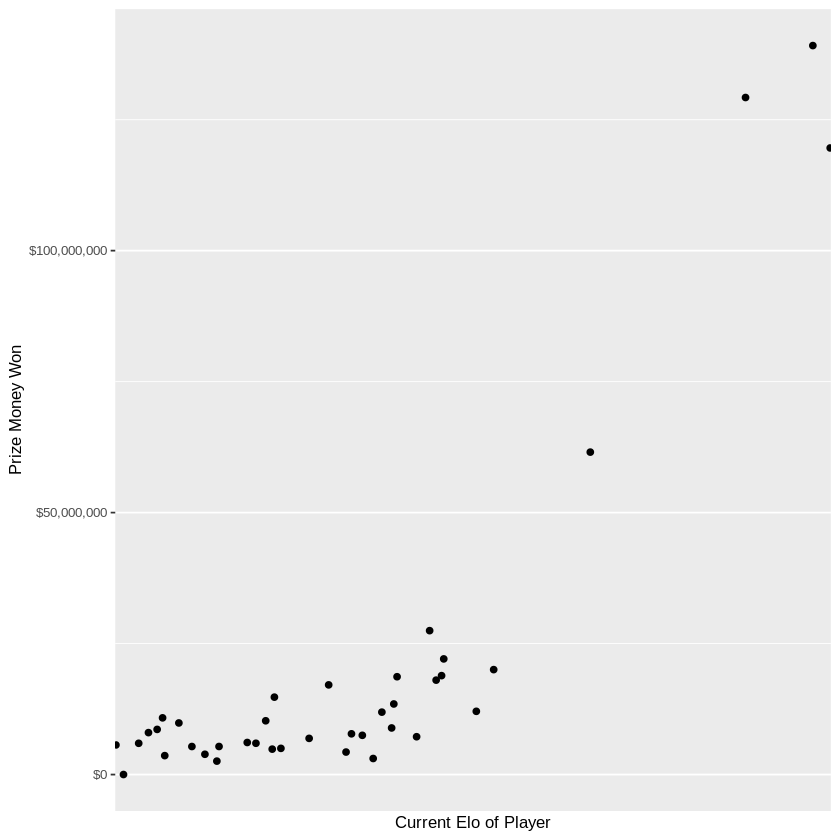

In [8]:
player_current_elo_plot <- ggplot(player_stats_train, aes(x = Current.Elo.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Current Elo of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  scale_x_discrete(breaks = seq(from = 0, to = 2406, by = 20)) +
  theme(text = element_text(size = 10)) + theme(axis.text.x = element_text(angle = 90, hjust = 1))

player_current_elo_plot

>> insert description of current elo plot

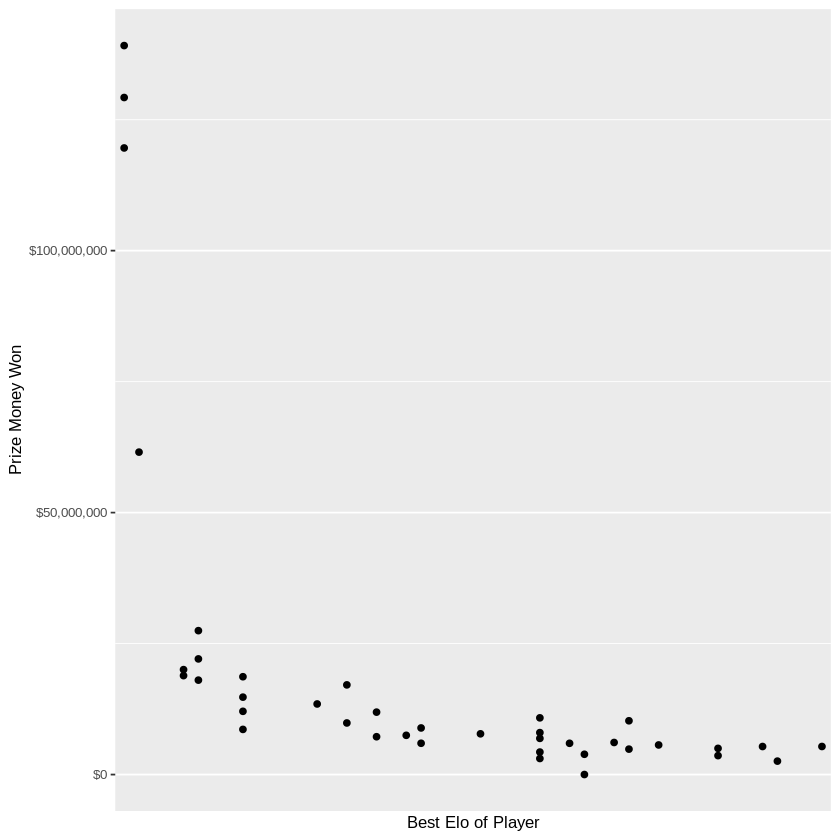

In [9]:
player_best_elo_plot <- ggplot(player_stats_train, aes(x = Best.Elo.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Best Elo of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  scale_x_discrete(breaks = seq(from = 0, to = 2406, by = 20)) +
  theme(text = element_text(size = 10)) + theme(axis.text.x = element_text(angle = 90, hjust = 1))

player_best_elo_plot

>> insert description of best elo plot

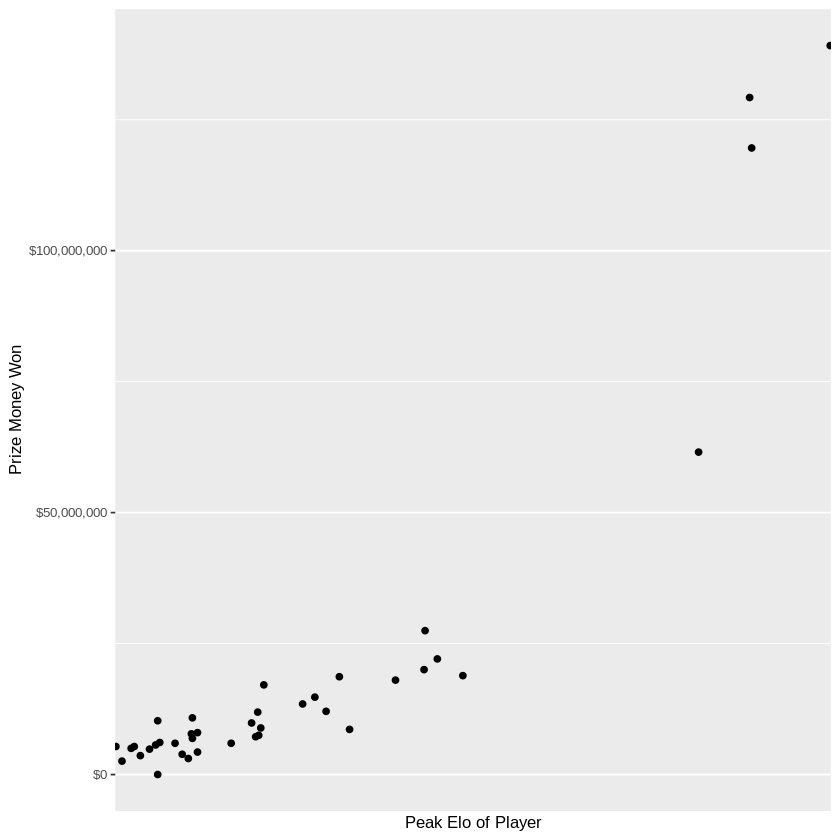

In [10]:
player_peak_elo_plot <- ggplot(player_stats_train, aes(x = Peak.Elo.Rating, y = Prize.Money)) +
  geom_point() +
  xlab("Peak Elo of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  scale_x_discrete(breaks = seq(from = 0, to = 2406, by = 20)) +
  theme(text = element_text(size = 10)) + theme(axis.text.x = element_text(angle = 90, hjust = 1))

player_peak_elo_plot

>> insert description of peak elo plot

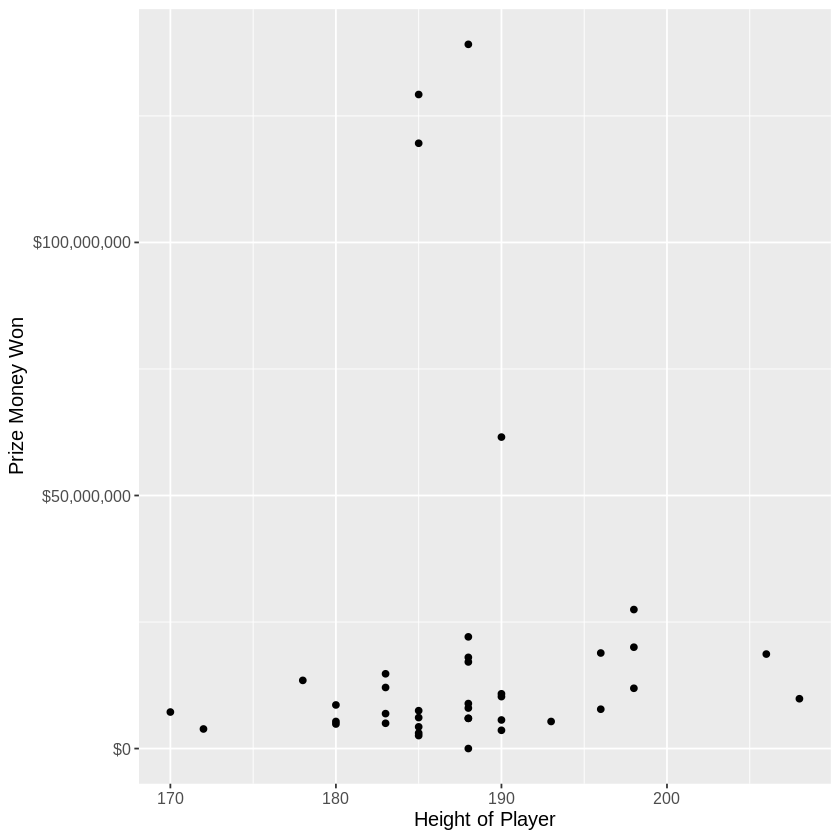

In [11]:
player_height_plot <- ggplot(player_stats_train, aes(x = Height, y = Prize.Money)) +
  geom_point() +
  xlab("Height of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_height_plot

>> insert description of height plot

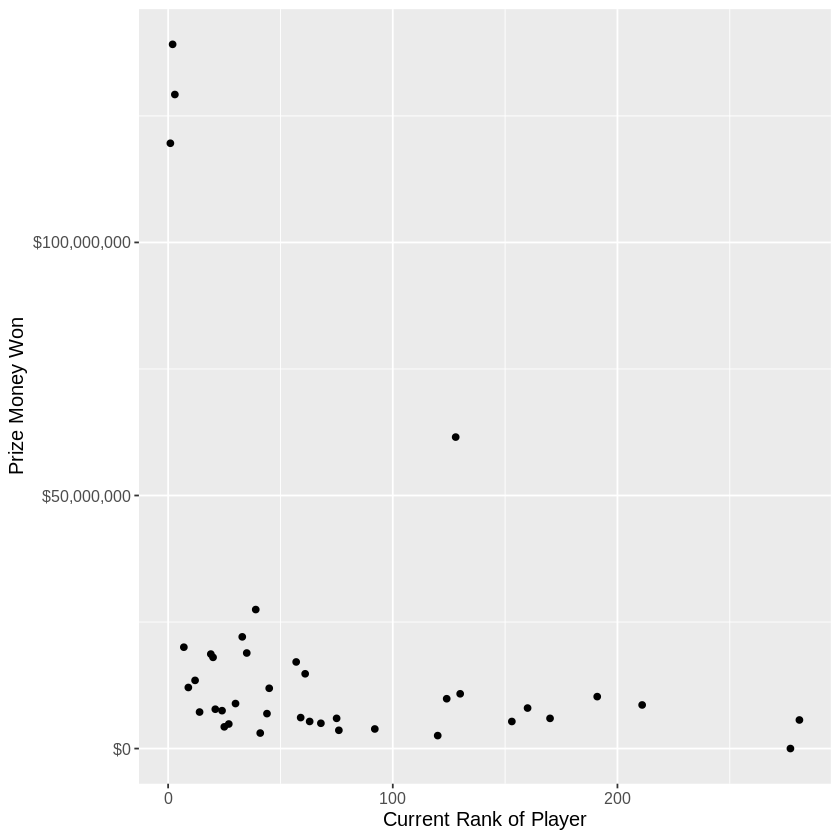

In [12]:
player_current_rank_plot <- ggplot(player_stats_train, aes(x = Current.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Current Rank of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_current_rank_plot

>> insert description of current rank plot

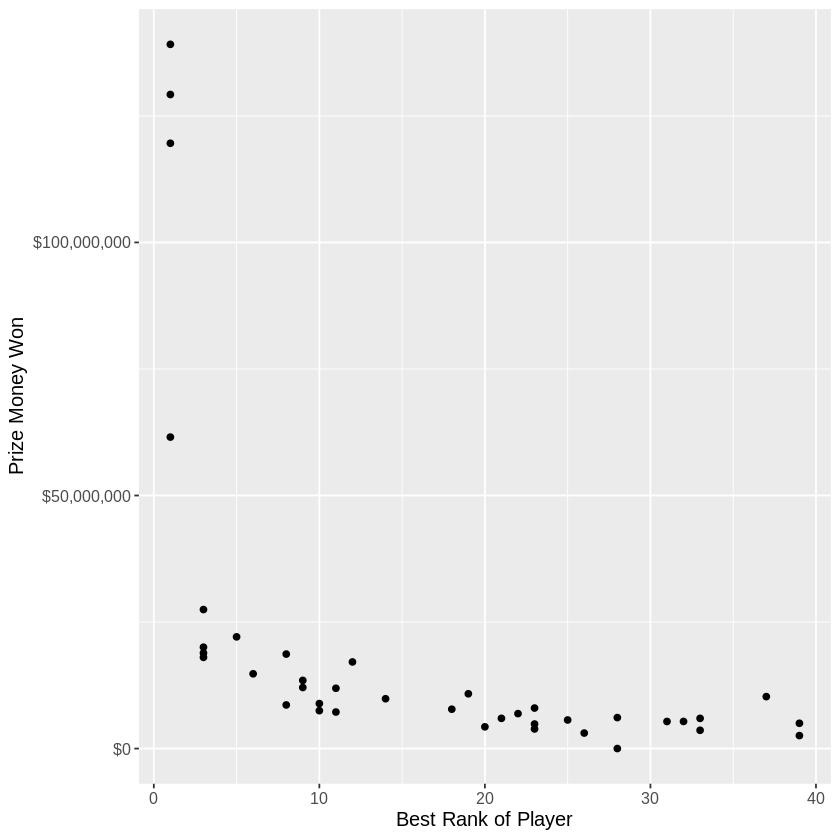

In [13]:
player_best_rank_plot <- ggplot(player_stats_train, aes(x = Best.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Best Rank of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_best_rank_plot

>> insert description of best rank plot

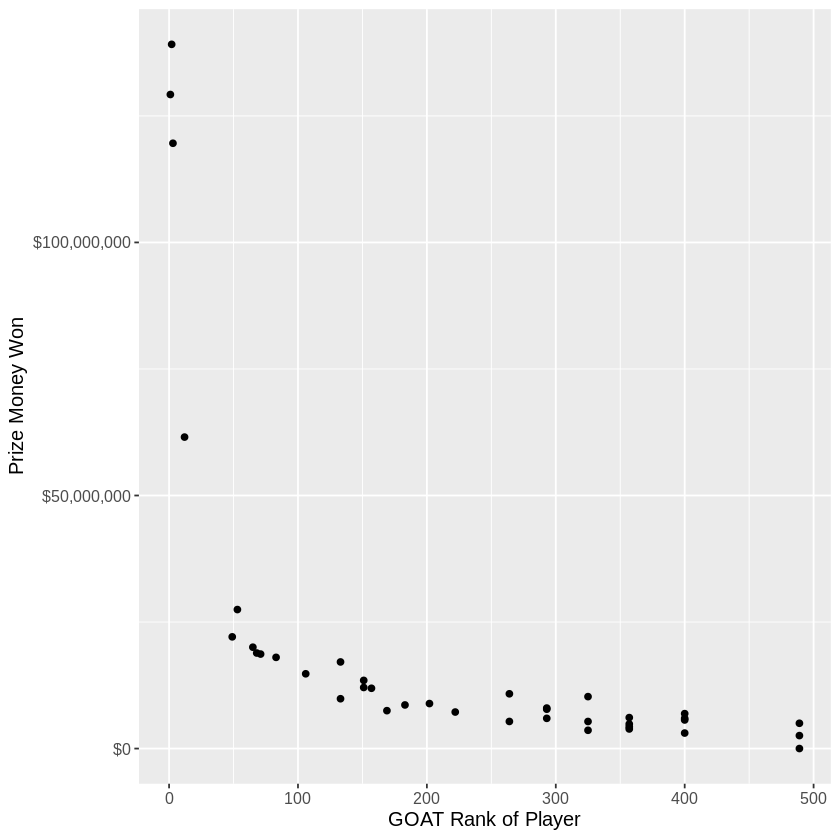

In [14]:
player_goat_rank_plot <- ggplot(player_stats_train, aes(x = GOAT.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("GOAT Rank of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_goat_rank_plot

>> insert description of goat rank plot

In [15]:
lm_spec <- linear_reg() |> set_engine("lm") |> set_mode("regression")

tennis_recipe_all <- recipe(
    Prize.Money ~ ., data = player_stats_train)

tennis_fit_all <- workflow() |> add_recipe(tennis_recipe_all) |>
                            add_model(lm_spec) |> 
                            fit(player_stats_train)
tennis_fit_all

lm_rmse_all <- tennis_fit_all |> predict(player_stats_train) |>
                         bind_cols(player_stats_train) |>
                         metrics(truth = Prize.Money, estimate = .pred) |> 
                         filter(.metric == "rmse") |>
                         select(.estimate) |>
                         pull()
lm_rmse_all

lm_rmspe_all <- tennis_fit_all |> predict(player_stats_test) |>
                          bind_cols(player_stats_test) |> 
                          metrics(truth = Prize.Money, estimate = .pred) |> 
                          filter(.metric == "rmse") |>
                          select(.estimate) |> 
                          pull()

lm_rmspe_all

tennis_recipe_best <- recipe(
    Prize.Money ~ Seasons + Current.Elo.Rank + Peak.Elo.Rating + Current.Rank + Best.Rank + GOAT.Rank, 
    data = player_stats_train)

tennis_fit_best <- workflow() |> add_recipe(tennis_recipe_best) |>
                            add_model(lm_spec) |> 
                            fit(player_stats_train)

tennis_fit_best

lm_rmse_best <- tennis_fit_best |> predict(player_stats_train) |>
                         bind_cols(player_stats_train) |>
                         metrics(truth = Prize.Money, estimate = .pred) |> 
                         filter(.metric == "rmse") |>
                         select(.estimate) |>
                         pull()
lm_rmse_best

lm_rmspe_best <- tennis_fit_best |> predict(player_stats_test) |>
                          bind_cols(player_stats_test) |> 
                          metrics(truth = Prize.Money, estimate = .pred) |> 
                          filter(.metric == "rmse") |>
                          select(.estimate) |> 
                          pull()
lm_rmspe_best

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
     (Intercept)               Age           Seasons  Current.Elo.Rank  
      -613108014            824089           1361785             33997  
   Best.Elo.Rank   Peak.Elo.Rating            Height      Current.Rank  
         1465687            227520             57917            -51680  
       Best.Rank         GOAT.Rank  
         -617175             65233  


[1] 6940181

[1] 11129017

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
     (Intercept)           Seasons  Current.Elo.Rank   Peak.Elo.Rating  
      -515931901           1633228             39671            196297  
    Current.Rank         Best.Rank         GOAT.Rank  
          -41215            895868             48245  


[1] 8757394

[1] 11260871

>> insert method and results

>> insert discussion

**MLA Cited References

Flake, Collin R., et al. “Advantage Men: The Sex Pay Gap in Professional Tennis .” International Review for the Sociology of Sport , vol. 48, no. 3, SAGE Publications , 2013, pp. 366–76, doi:10.1177/1012690212442166 .
 
Jenkat, Rahul. “Tennis Rules: Know How to Play.” Olympics.com, International Olympic Committee, 1 Aug. 2022, https://olympics.com/en/news/tennis-rules-regulations-how-to-play-basics. 

Jeff, Author. “An Introduction to Tennis Elo.” Heavy Topspin, 3 Dec. 2019, http://www.tennisabstract.com/blog/2019/12/03/an-introduction-to-tennis-elo/. 

Šimić, Vladimir. “Prize Money Earnings of Tennis Professionals and the Impact of COVID-19 Pandemic .” International Journal of Business and Economic Sciences Applied Research , vol. 14, no. 1, Eastern Macedonia and Thrace Institute of Technology , 2021, pp. 47–57, doi:10.25103/ijbesar.141.04 .

Ultimate Tennis Statistics, https://www.ultimatetennisstatistics.com/. 